In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans 

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<Axes: >

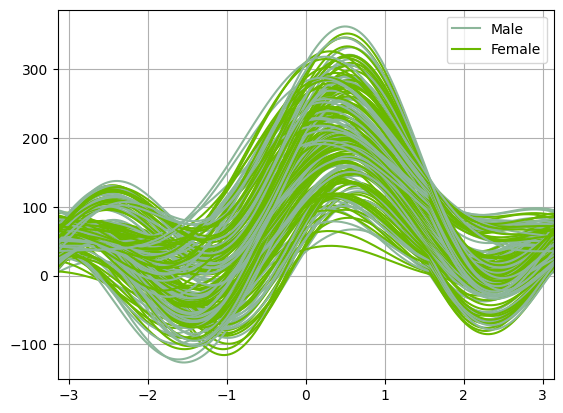

In [4]:
pd.plotting.andrews_curves(df, 'Gender')

In [5]:
x = df.iloc[:,[3,4]].values # : means to select all rows here we are selecting the 3rd and 4th column.


In [7]:
wcss = []   # Finding the suitable number of clusters to use
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
wcss

[269981.28,
 183069.17582751298,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37558.92202302528,
 31573.960664122744,
 29439.878135591796,
 23243.148074793422,
 19704.12354314778]

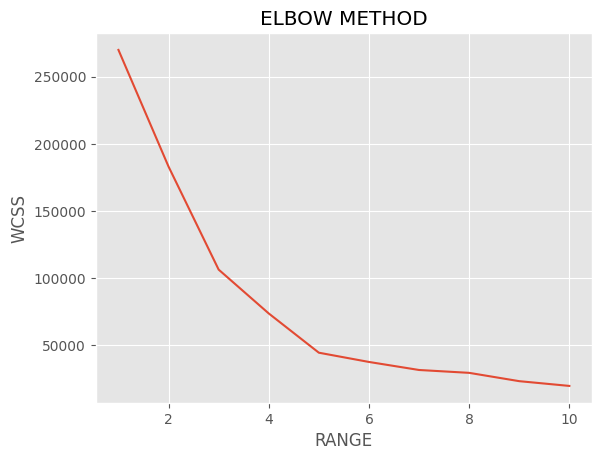

In [8]:
# Plot the result to find the suitable cluster to use.
plt.style.use('ggplot')
plt.plot(range(1,11),wcss)
plt.xlabel('RANGE')
plt.ylabel('WCSS')
plt.title('ELBOW METHOD')
plt.show()


In [9]:
km = KMeans(n_clusters=5) # building the cluster using kmeans with 5 as number of cluster, from above plot.
ymeans = km.fit_predict(x) # x is annual income spending score
ymeans

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

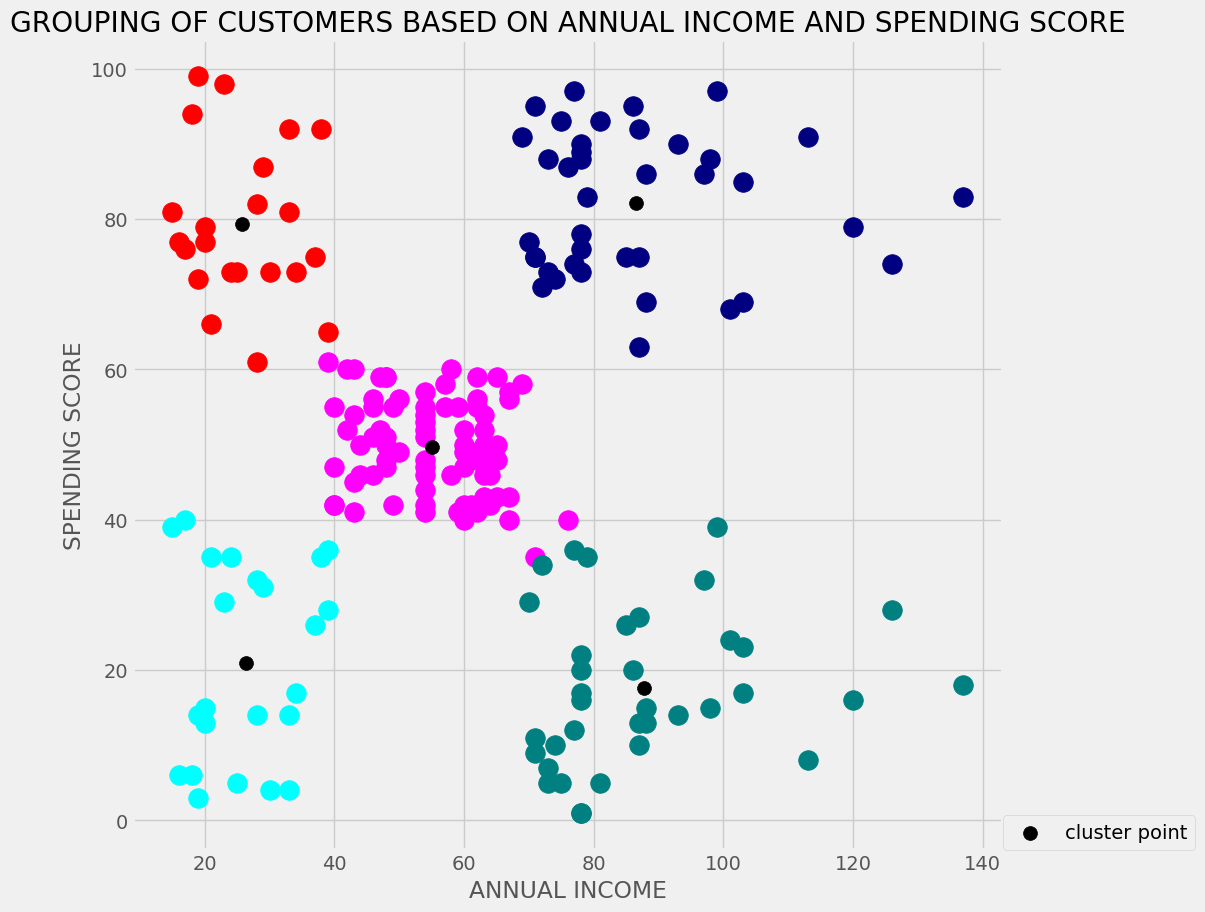

In [11]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.scatter(x[ymeans == 0,0], x[ymeans == 0,1], c='red',s=200)
plt.scatter(x[ymeans == 1,0], x[ymeans == 1,1], c='magenta',s=200)
plt.scatter(x[ymeans == 2,0], x[ymeans == 2,1], c='teal',s=200)
plt.scatter(x[ymeans == 3,0], x[ymeans == 3,1], c='navy',s=200)
plt.scatter(x[ymeans == 4,0], x[ymeans == 4,1], c='cyan',s=200)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=100, c='black',label='cluster point')
plt.xlabel('ANNUAL INCOME')
plt.ylabel('SPENDING SCORE')
plt.title('GROUPING OF CUSTOMERS BASED ON ANNUAL INCOME AND SPENDING SCORE')
plt.legend(loc=[1,0])
plt.show()

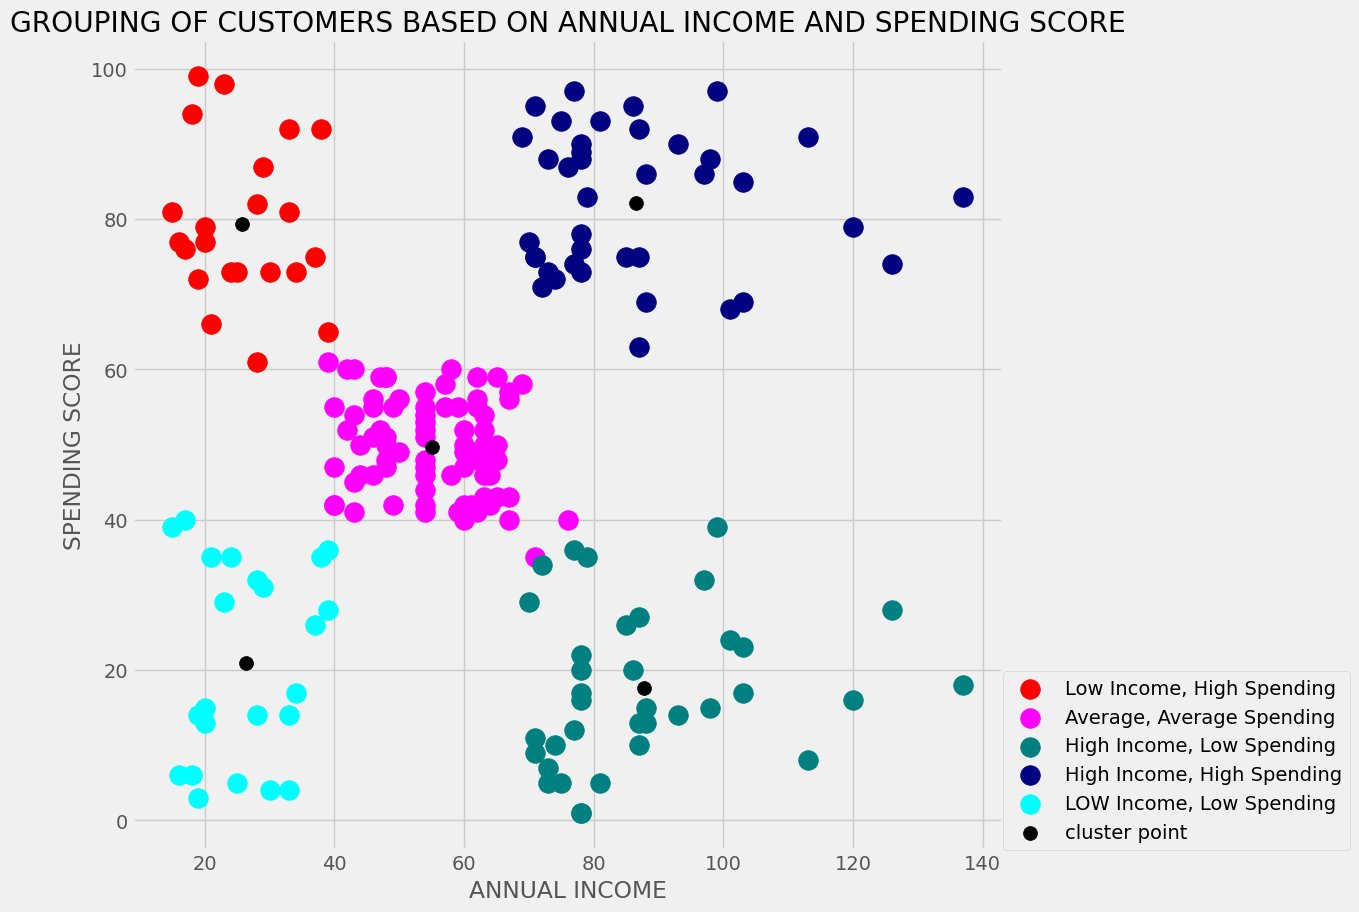

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.scatter(x[ymeans == 0,0], x[ymeans == 0,1], c='red',s=200,label='Low Income, High Spending')
plt.scatter(x[ymeans == 1,0], x[ymeans == 1,1], c='magenta',s=200,label='Average, Average Spending' )
plt.scatter(x[ymeans == 2,0], x[ymeans == 2,1], c='teal',s=200, label='High Income, Low Spending')
plt.scatter(x[ymeans == 3,0], x[ymeans == 3,1], c='navy',s=200,label='High Income, High Spending')
plt.scatter(x[ymeans == 4,0], x[ymeans == 4,1], c='cyan',s=200, label='LOW Income, Low Spending')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=100, c='black',label='cluster point')
plt.xlabel('ANNUAL INCOME')
plt.ylabel('SPENDING SCORE')
plt.title('GROUPING OF CUSTOMERS BASED ON ANNUAL INCOME AND SPENDING SCORE')
plt.legend(loc=[1,0])
plt.show()